In [55]:
using CSV
using Plots
using DataFrames

In [56]:
mutable struct data
    df::DataFrame
    ptx::Float32
    pty::Float32
    ptz::Float32
end

In [57]:
ogs5_THM=Array{data}(undef, 4)

4-element Array{data,1}:
 #undef
 #undef
 #undef
 #undef

## Read in OGS5 data, tuple defines all four observation points

In [58]:
ogs5_THM[1]=data(CSV.read("ogs5_heat_0_30_1-8.csv"),0.0,30.0,1.8)
ogs5_THM[2]=data(CSV.read("ogs5_heat_0_30_3.csv"),0.0,30.0,3.0)
ogs5_THM[3]=data(CSV.read("ogs5_heat_10_30_5.csv"),10.0,30.0,5.0)
ogs5_THM[4]=data(CSV.read("ogs5_heat_0_30_20.csv"),0.0,30.0,20.0)

data(116×38 DataFrame. Omitted printing of 32 columns
│ Row │ N     │ Time    │ avg(TEMPERATURE1) │ avg(X)   │ avg(Y)  │ avg(Z)  │
│     │ Int64 │ Float64 │ Float64           │ Float64  │ Float64 │ Float64 │
├─────┼───────┼─────────┼───────────────────┼──────────┼─────────┼─────────┤
│ 1   │ 1     │ 0.0     │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 2   │ 1     │ 2.0     │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 3   │ 1     │ 4.0     │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 4   │ 1     │ 6.0     │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 5   │ 1     │ 8.0     │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 6   │ 1     │ 10.0    │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 7   │ 1     │ 12.0    │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 8   │ 1     │ 14.0    │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 9   │ 1     │ 16.0    │ 15.837            │ -0.57038 │ 30.2    │ 19.381  │
│ 10  │ 1     │ 18.0  

In [59]:
for i in 1:4
    insert!(ogs5_THM[i].df, 3, ogs5_THM[i].df[:Time]*24*60*60, :Time_s)
end

In [60]:
CSV.read("ogs5_mech_0_30_1-8.csv")["avg(DISPLACEMENT (0))"]

116-element CSV.Column{Float64,Float64}:
  0.0
  1.6239e-7
  2.9267e-7
 -1.2005e-6
  5.3278e-7
  2.1777e-7
  4.1689e-6
  7.9791e-7
  9.0179e-7
  9.997e-7
  1.0995e-6
  1.1909e-6
  1.2824e-6
  ⋮
 -0.00013222
 -0.00013076
 -0.00013096
 -0.00012979
 -0.00012911
 -0.00012776
 -0.00012739
 -0.00012667
 -0.00012592
 -0.00012517
 -0.00012449
 -0.00012383

In [61]:
insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_richards_0_30_1-8.csv")["avg(PRESSURE1)"], :pressure )
insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_richards_0_30_3.csv")["avg(PRESSURE1)"], :pressure )
insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_richards_10_30_5.csv")["avg(PRESSURE1)"], :pressure )
insert!(ogs5_THM[4].df, 4,CSV.read("ogs5_richards_0_30_20.csv")["avg(PRESSURE1)"], :pressure )

,N,Time,Time_s,pressure,avg(TEMPERATURE1),avg(X),avg(Y),avg(Z)
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.0,0.0,1.4441e6,15.837,-0.57038,30.2,19.381
2,1,2.0,172800.0,1.4441e6,15.837,-0.57038,30.2,19.381
3,1,4.0,345600.0,1.4441e6,15.837,-0.57038,30.2,19.381
4,1,6.0,518400.0,1.4441e6,15.837,-0.57038,30.2,19.381
5,1,8.0,691200.0,1.4441e6,15.837,-0.57038,30.2,19.381
6,1,10.0,864000.0,1.4441e6,15.837,-0.57038,30.2,19.381
7,1,12.0,1.0368e6,1.4441e6,15.837,-0.57038,30.2,19.381
8,1,14.0,1.2096e6,1.4441e6,15.837,-0.57038,30.2,19.381
9,1,16.0,1.3824e6,1.4441e6,15.837,-0.57038,30.2,19.381


In [62]:
insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_mech_0_30_1-8.csv")["avg(DISPLACEMENT (0))"], :displ0 )
insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_mech_0_30_3.csv")["avg(DISPLACEMENT (0))"], :displ0 )
insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_mech_10_30_5.csv")["avg(DISPLACEMENT (0))"], :displ0 )
insert!(ogs5_THM[4].df, 4,CSV.read("ogs5_mech_0_30_20.csv")["avg(DISPLACEMENT (0))"], :displ0 )

,N,Time,Time_s,displ0,pressure,avg(TEMPERATURE1),avg(X),avg(Y)
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.0,0.0,0.0,1.4441e6,15.837,-0.57038,30.2
2,1,2.0,172800.0,9.1813e-9,1.4441e6,15.837,-0.57038,30.2
3,1,4.0,345600.0,3.9389e-8,1.4441e6,15.837,-0.57038,30.2
4,1,6.0,518400.0,-1.1218e-6,1.4441e6,15.837,-0.57038,30.2
5,1,8.0,691200.0,1.0492e-7,1.4441e6,15.837,-0.57038,30.2
6,1,10.0,864000.0,1.0431e-7,1.4441e6,15.837,-0.57038,30.2
7,1,12.0,1.0368e6,1.3253e-6,1.4441e6,15.837,-0.57038,30.2
8,1,14.0,1.2096e6,1.9923e-7,1.4441e6,15.837,-0.57038,30.2
9,1,16.0,1.3824e6,2.3284e-7,1.4441e6,15.837,-0.57038,30.2


In [63]:
insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_mech_0_30_1-8.csv")["avg(DISPLACEMENT (1))"], :displ1 )
insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_mech_0_30_3.csv")["avg(DISPLACEMENT (1))"], :displ1 )
insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_mech_10_30_5.csv")["avg(DISPLACEMENT (1))"], :displ1 )
insert!(ogs5_THM[4].df, 4,CSV.read("ogs5_mech_0_30_20.csv")["avg(DISPLACEMENT (1))"], :displ1 )

,N,Time,Time_s,displ1,displ0,pressure,avg(TEMPERATURE1)
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.0,0.0,0.0,0.0,1.4441e6,15.837
2,1,2.0,172800.0,2.7472e-7,9.1813e-9,1.4441e6,15.837
3,1,4.0,345600.0,3.8135e-7,3.9389e-8,1.4441e6,15.837
4,1,6.0,518400.0,7.6604e-7,-1.1218e-6,1.4441e6,15.837
5,1,8.0,691200.0,5.3268e-7,1.0492e-7,1.4441e6,15.837
6,1,10.0,864000.0,4.4969e-7,1.0431e-7,1.4441e6,15.837
7,1,12.0,1.0368e6,2.1237e-6,1.3253e-6,1.4441e6,15.837
8,1,14.0,1.2096e6,7.1905e-7,1.9923e-7,1.4441e6,15.837
9,1,16.0,1.3824e6,7.7227e-7,2.3284e-7,1.4441e6,15.837


In [64]:
insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_mech_0_30_1-8.csv")["avg(DISPLACEMENT (2))"], :displ2 )
insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_mech_0_30_3.csv")["avg(DISPLACEMENT (2))"], :displ2 )
insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_mech_10_30_5.csv")["avg(DISPLACEMENT (2))"], :displ2 )
insert!(ogs5_THM[4].df, 4,CSV.read("ogs5_mech_0_30_20.csv")["avg(DISPLACEMENT (2))"], :displ2 )

,N,Time,Time_s,displ2,displ1,displ0,pressure,avg(TEMPERATURE1)
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.0,0.0,0.0,0.0,0.0,1.4441e6,15.837
2,1,2.0,172800.0,4.5066e-7,2.7472e-7,9.1813e-9,1.4441e6,15.837
3,1,4.0,345600.0,5.1963e-7,3.8135e-7,3.9389e-8,1.4441e6,15.837
4,1,6.0,518400.0,-1.6093e-6,7.6604e-7,-1.1218e-6,1.4441e6,15.837
5,1,8.0,691200.0,5.2659e-7,5.3268e-7,1.0492e-7,1.4441e6,15.837
6,1,10.0,864000.0,3.1186e-7,4.4969e-7,1.0431e-7,1.4441e6,15.837
7,1,12.0,1.0368e6,3.5296e-6,2.1237e-6,1.3253e-6,1.4441e6,15.837
8,1,14.0,1.2096e6,4.4538e-7,7.1905e-7,1.9923e-7,1.4441e6,15.837
9,1,16.0,1.3824e6,4.0007e-7,7.7227e-7,2.3284e-7,1.4441e6,15.837


# Temp/Press OGS5 THM (richards) output, 3 points vs time in s

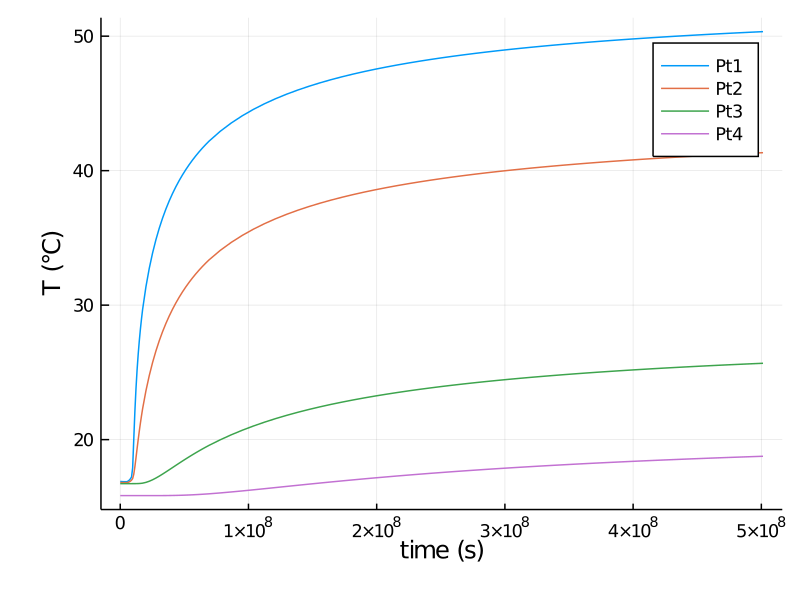

In [65]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df["avg(TEMPERATURE1)"], label="Pt1", size=(800,600),thickness_scaling=1.5)
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df["avg(TEMPERATURE1)"], label="Pt2")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df["avg(TEMPERATURE1)"], label="Pt3")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[4].df["avg(TEMPERATURE1)"], label="Pt4")
xlabel!("time (s)")
ylabel!("T (°C)")

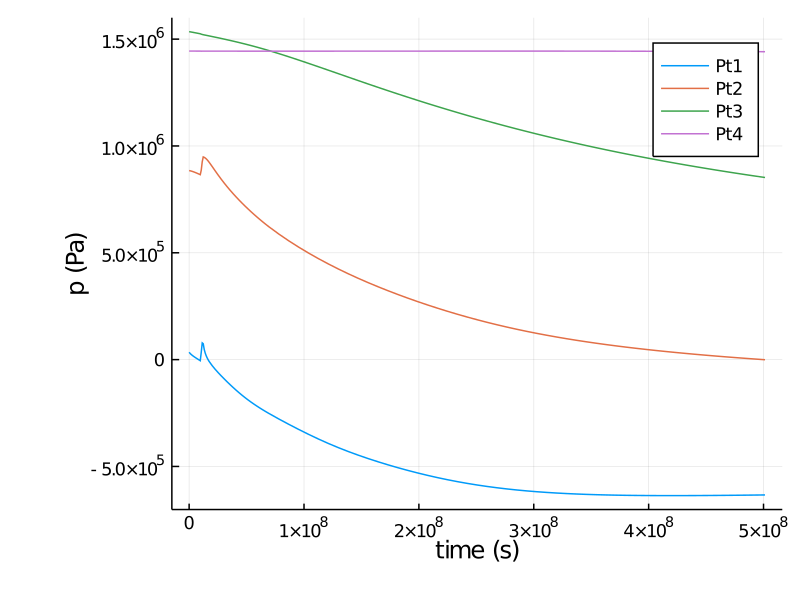

In [66]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:pressure], label="Pt1", size=(800,600),thickness_scaling=1.5)
plot!(ogs5_THM[2].df["Time_s"],ogs5_THM[2].df[:pressure], label="Pt2")
plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[3].df[:pressure], label="Pt3")
plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[4].df[:pressure], label="Pt4")
xlabel!("time (s)")
ylabel!("p (Pa)")

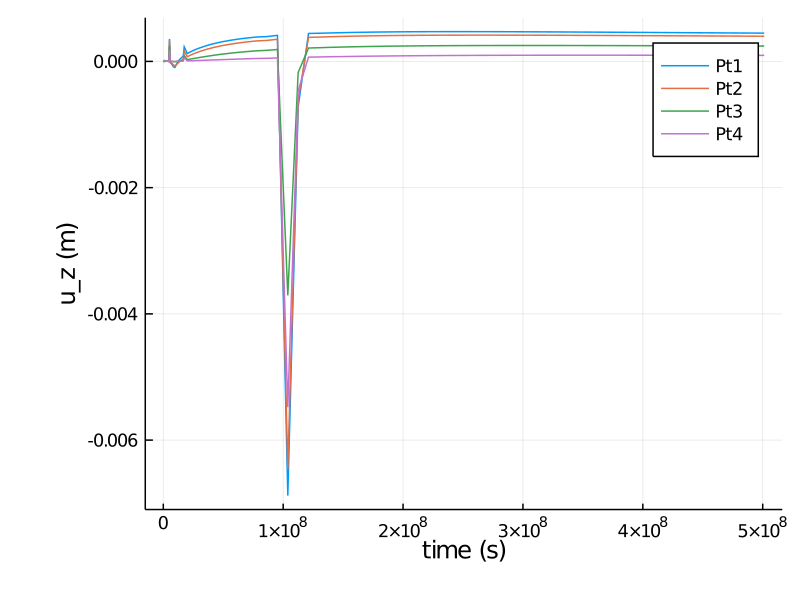

In [73]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:displ1], label="Pt1", size=(800,600),thickness_scaling=1.5)
plot!(ogs5_THM[2].df["Time_s"],ogs5_THM[2].df[:displ1], label="Pt2")
plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[3].df[:displ1], label="Pt3")
plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[4].df[:displ1], label="Pt4")
xlabel!("time (s)")
ylabel!("u_z (m)")

# FE-exp OGS5 THM richards vs THM sat anisotropic elastic

In [74]:
#ogs6_HTm2=Array{data}(undef, 3)
ogs6_THM=Array{data}(undef, 4)
#ogs6_THM2=Array{data}(undef, 3)

4-element Array{data,1}:
 #undef
 #undef
 #undef
 #undef

In [75]:
#ogs6_HTm2[1]=data(CSV.read("ogs6_HTm2_0_30_20.csv"),0.0,30.0,20.0)
#ogs6_HTm2[2]=data(CSV.read("ogs6_HTm2_0_30_3.csv"),0.0,30.0,3.0)
#ogs6_HTm2[3]=data(CSV.read("ogs6_HTm2_10_30_5.csv"),10.0,30.0,5.0)
#ogs6_THM1[1]=data(CSV.read("ogs6_THM_isoelastic_0_30_20.csv"),0.0,30.0,20.0)
#ogs6_THM1[2]=data(CSV.read("ogs6_THM_isoelastic_0_30_3.csv"),0.0,30.0,3.0)
#ogs6_THM1[3]=data(CSV.read("ogs6_THM_isoelastic_10_30_5.csv"),10.0,30.0,5.0)
ogs6_THM[1]=data(CSV.read("ogs6_THM_anisoelastic_0_30_1-8.csv"),0.0,30.0,1.8)
ogs6_THM[2]=data(CSV.read("ogs6_THM_anisoelastic_0_30_3.csv"),0.0,30.0,3.0)
ogs6_THM[3]=data(CSV.read("ogs6_THM_anisoelastic_10_30_5.csv"),10.0,30.0,5.0)
ogs6_THM[4]=data(CSV.read("ogs6_THM_anisoelastic_0_30_20.csv"),0.0,30.0,20.0)

data(83×234 DataFrame. Omitted printing of 230 columns
│ Row │ N     │ Time     │ avg(HydraulicFlow) │ avg(NodalForces (0)) │
│     │ Int64 │ Float64  │ Float64            │ Float64              │
├─────┼───────┼──────────┼────────────────────┼──────────────────────┤
│ 1   │ 1     │ 0.0      │ 0.0                │ 0.0                  │
│ 2   │ 1     │ 172800.0 │ -1.0547e-15        │ 2.3287e-24           │
│ 3   │ 1     │ 345600.0 │ -1.138e-14         │ 5.0187e-25           │
│ 4   │ 1     │ 518400.0 │ 3.0337e-14         │ -3.321e-25           │
│ 5   │ 1     │ 691200.0 │ -2.065e-14         │ 1.2108e-24           │
│ 6   │ 1     │ 864000.0 │ 2.8401e-14         │ -7.4126e-25          │
│ 7   │ 1     │ 1.0368e6 │ -1.1442e-14        │ 7.4158e-25           │
│ 8   │ 1     │ 1.2096e6 │ 7.4593e-15         │ -1.983e-24           │
│ 9   │ 1     │ 1.3824e6 │ -8.7423e-14        │ 3.9952e-25           │
│ 10  │ 1     │ 1.5552e6 │ 7.1262e-14         │ -2.9975e-24          │
⋮
│ 73  │ 1     │ 1.29

# PT1: Temperature

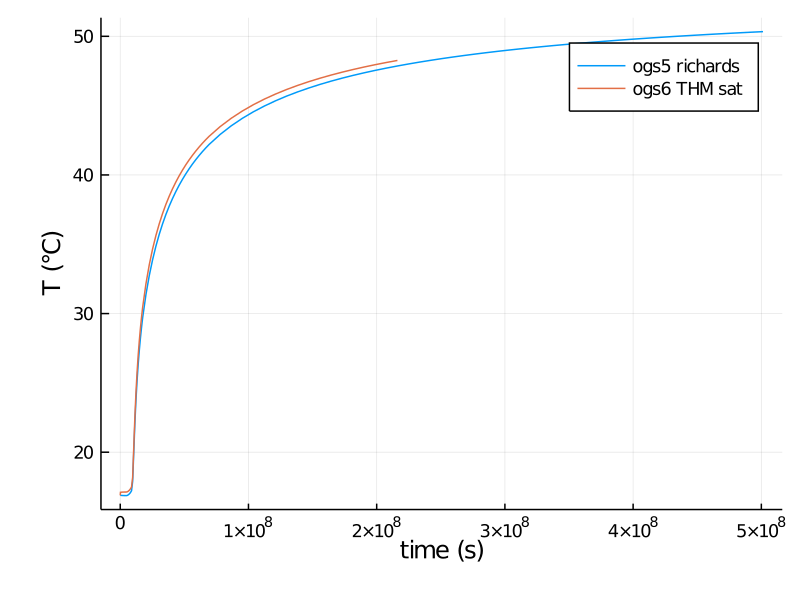

In [96]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df["avg(TEMPERATURE1)"], label="ogs5 richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(temperature)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("T (°C)")

# PT1: pressure

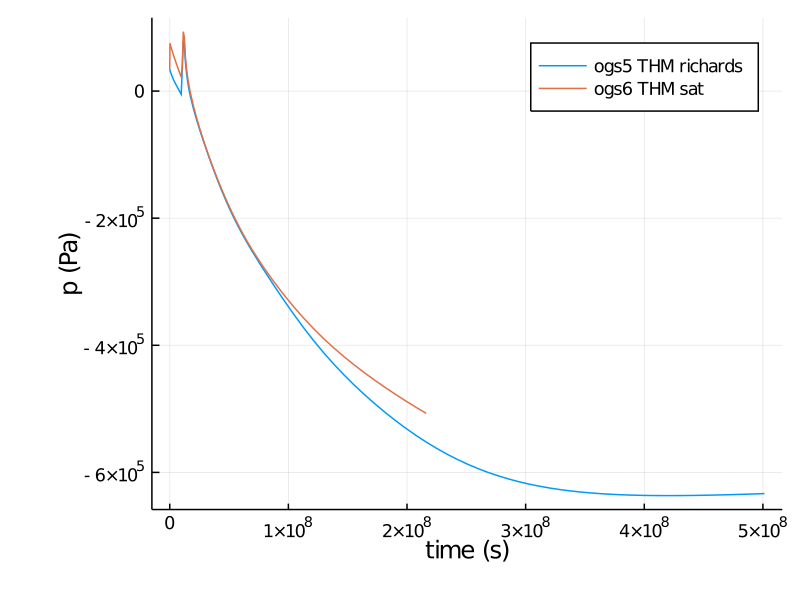

In [97]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(pressure)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("p (Pa)")

# PT1 displacement

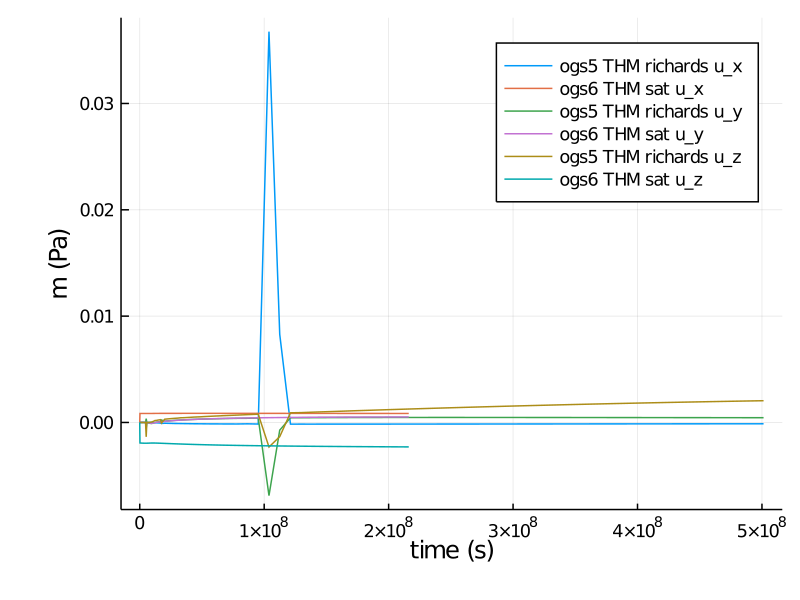

In [95]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:displ0], label="ogs5 THM richards u_x", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(displacement (0))"], label="ogs6 THM sat u_x")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:displ1], label="ogs5 THM richards u_y", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(displacement (1))"], label="ogs6 THM sat u_y")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:displ2], label="ogs5 THM richards u_z", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(displacement (2))"], label="ogs6 THM sat u_z")
xlabel!("time (s)")
ylabel!("m (Pa)")

# PT2: Temperature

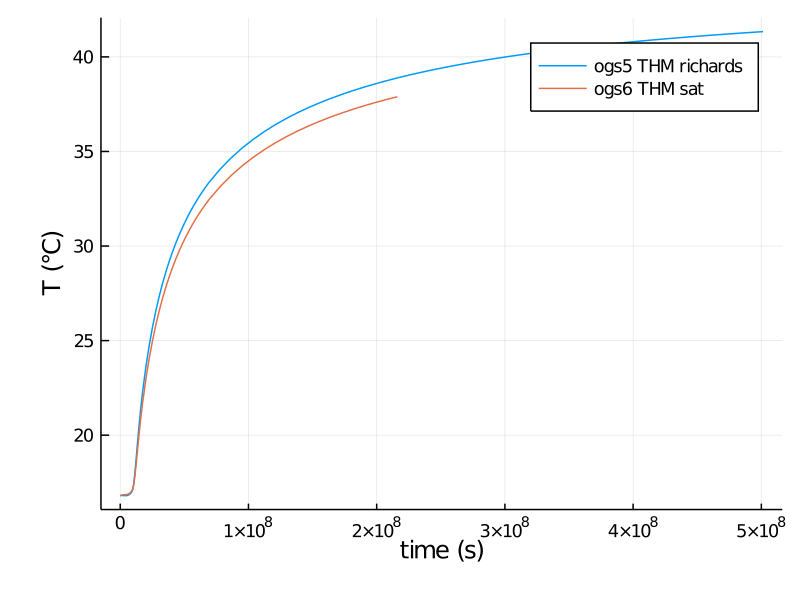

In [98]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df["avg(TEMPERATURE1)"], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[2].df["avg(temperature)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("T (°C)")

# PT2: pressure

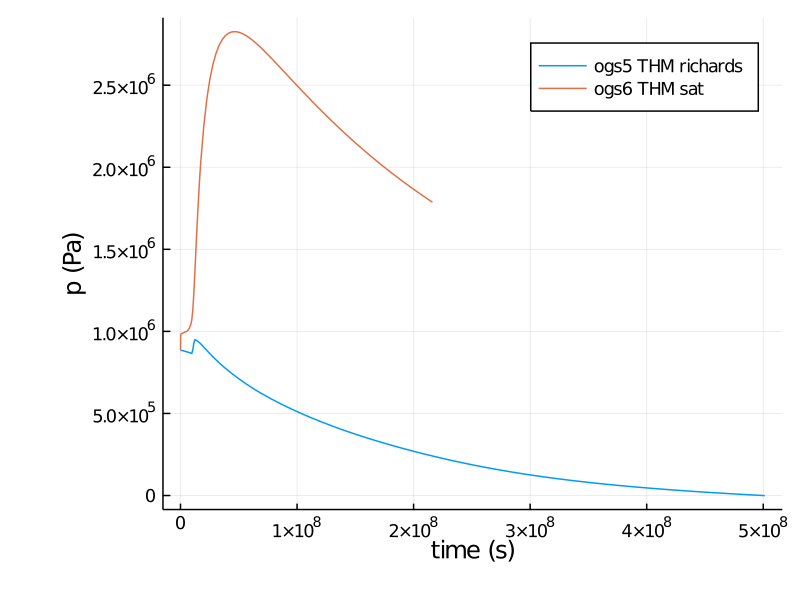

In [99]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[2].df["avg(pressure)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("p (Pa)")

# PT2 displacement

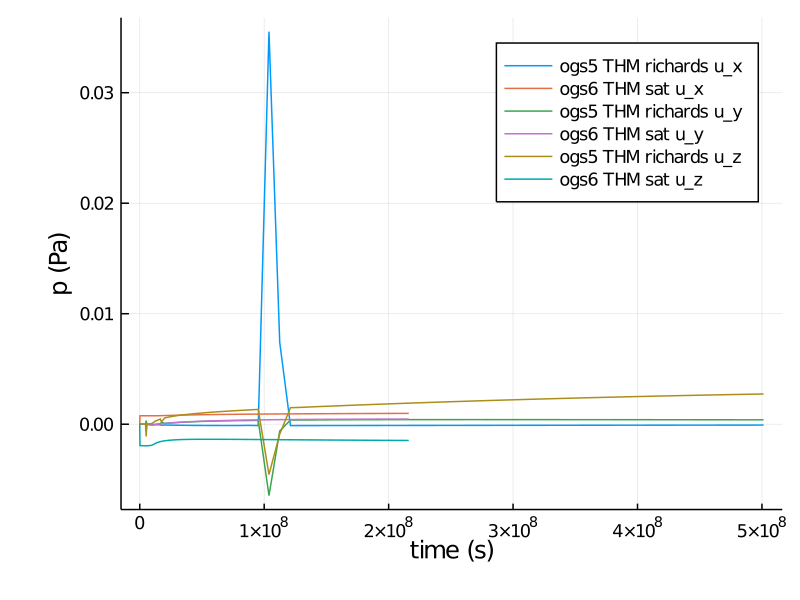

In [87]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df[:displ0], label="ogs5 THM richards u_x", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[2].df["avg(displacement (0))"], label="ogs6 THM sat u_x")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df[:displ1], label="ogs5 THM richards u_y", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[2].df["avg(displacement (1))"], label="ogs6 THM sat u_y")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df[:displ2], label="ogs5 THM richards u_z", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[2].df["avg(displacement (2))"], label="ogs6 THM sat u_z")
xlabel!("time (s)")
ylabel!("p (Pa)")

# PT3: Temperature

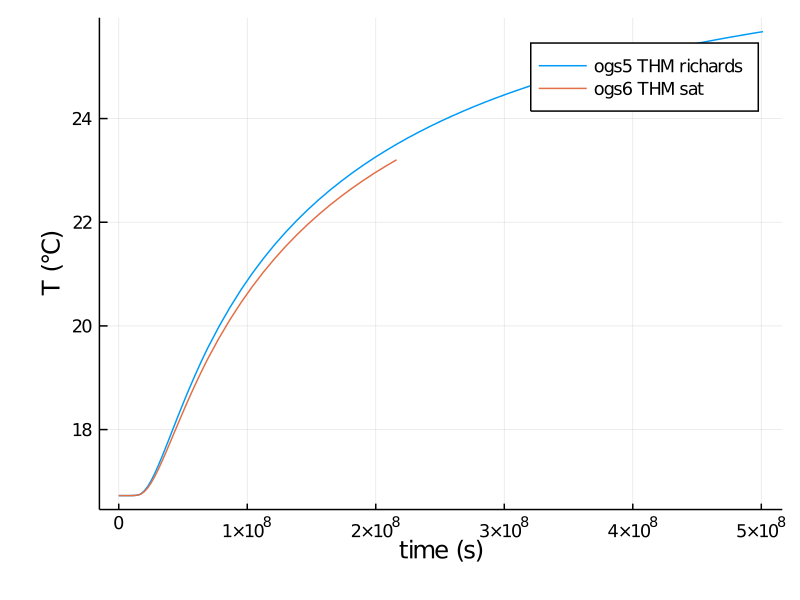

In [100]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df["avg(TEMPERATURE1)"], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(temperature)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("T (°C)")

# PT3: pressure

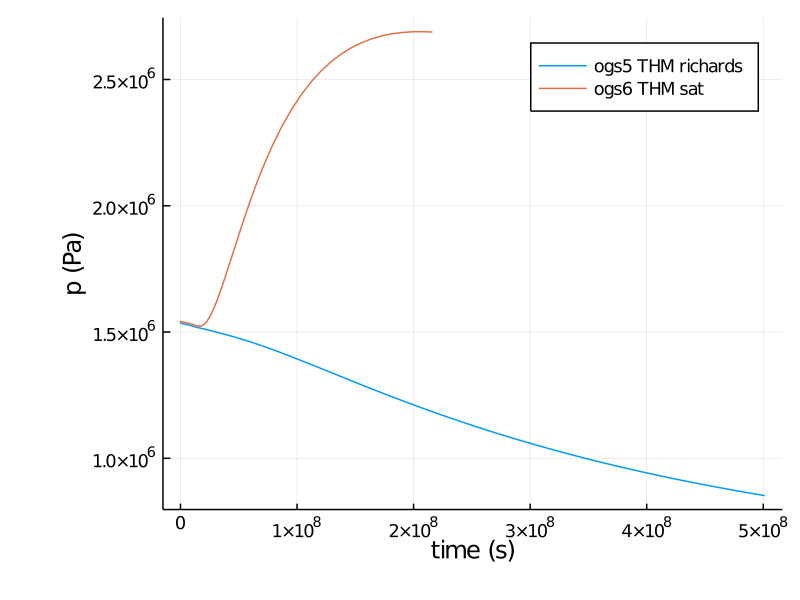

In [101]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(pressure)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("p (Pa)")

# PT3 displacement

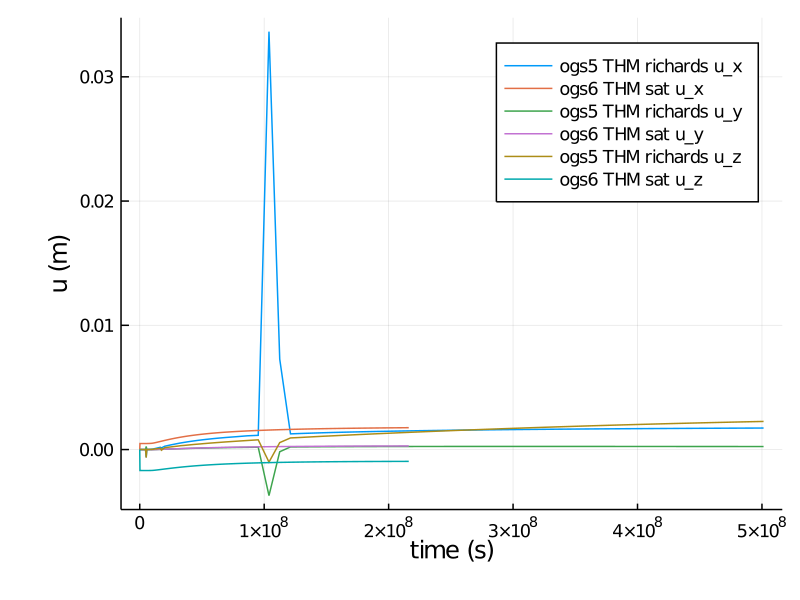

In [91]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df[:displ0], label="ogs5 THM richards u_x", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(displacement (0))"], label="ogs6 THM sat u_x")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df[:displ1], label="ogs5 THM richards u_y", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(displacement (1))"], label="ogs6 THM sat u_y")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df[:displ2], label="ogs5 THM richards u_z", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(displacement (2))"], label="ogs6 THM sat u_z")
xlabel!("time (s)")
ylabel!("u (m)")

# PT4: Temperature

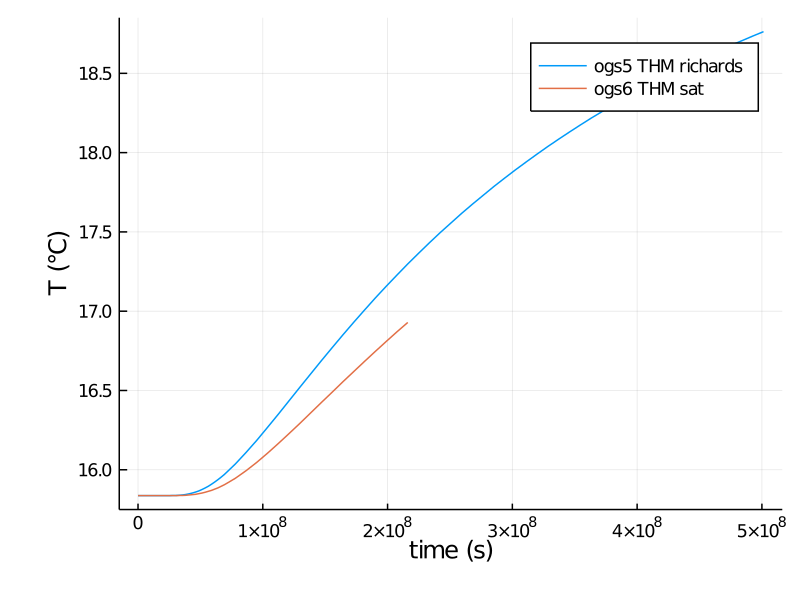

In [102]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[4].df["avg(TEMPERATURE1)"], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[4].df["avg(temperature)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("T (°C)")

# PT4: pressure

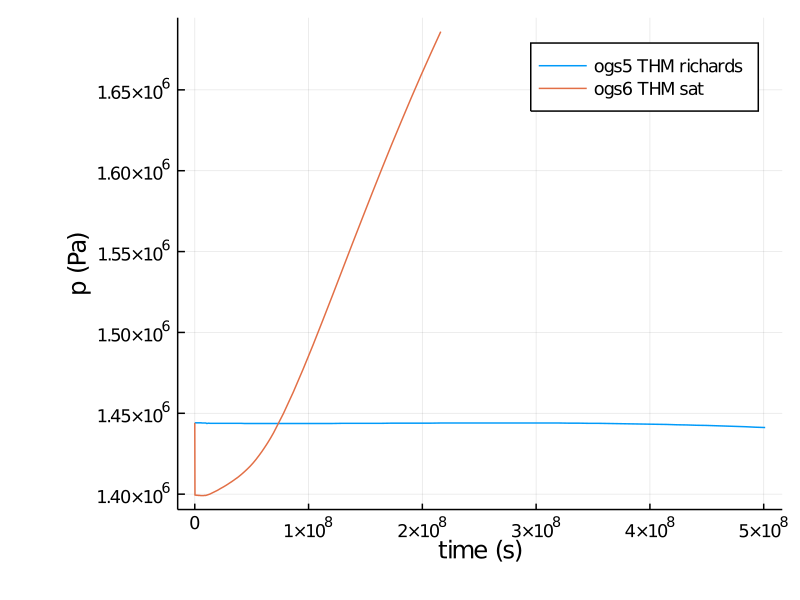

In [103]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[4].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[4].df["avg(pressure)"], label="ogs6 THM sat")
xlabel!("time (s)")
ylabel!("p (Pa)")

# PT4 displacement

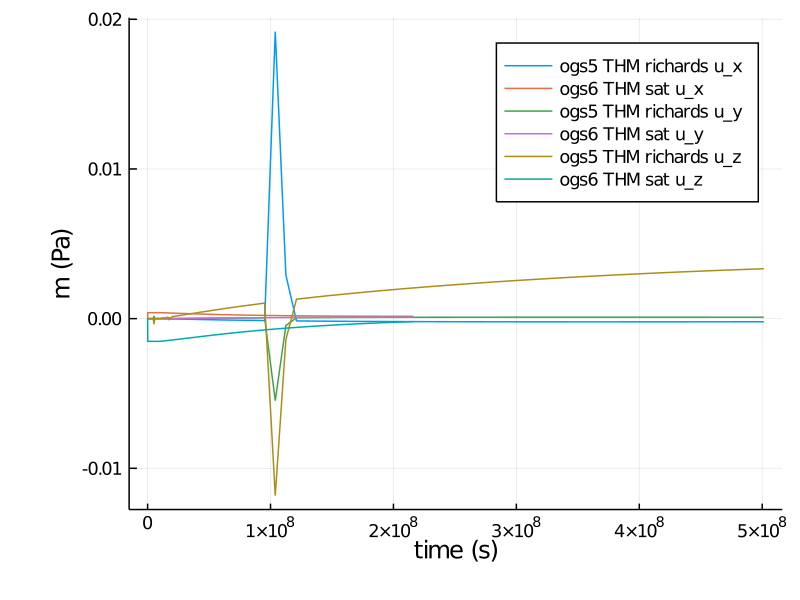

In [94]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[4].df[:displ0], label="ogs5 THM richards u_x", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[4].df["avg(displacement (0))"], label="ogs6 THM sat u_x")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[4].df[:displ1], label="ogs5 THM richards u_y", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[4].df["avg(displacement (1))"], label="ogs6 THM sat u_y")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[4].df[:displ2], label="ogs5 THM richards u_z", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_THM[1].df["Time"],ogs6_THM[4].df["avg(displacement (2))"], label="ogs6 THM sat u_z")
xlabel!("time (s)")
ylabel!("m (Pa)")